In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/baptistecarbillet/Documents/MachineLearning1/winequality-white.csv',sep=';')
df['y'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df = df.drop('quality',axis=1)

X,y = np.array(df.drop('y',axis=1)),np.array(df['y'])

#Normalize X
X = (X - np.mean(X,axis=0))/np.std(X,axis=0)

from sklearn.model_selection import train_test_split

random_state = 75 #Paris

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

In [21]:
df.shape

(4898, 12)

In [3]:
from sklearn.svm import SVC

model = SVC(kernel='poly',gamma='auto',random_state=random_state)



from sklearn.model_selection import KFold, cross_validate
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True,random_state=random_state)


scoring=('f1')

scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)

print("Train accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print("Test accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

Train accuracy: 0.37 (+/- 0.07)
Test accuracy: 0.30 (+/- 0.05)


In [4]:
from sklearn.svm import SVC

model = SVC(kernel='rbf',gamma='auto',random_state=random_state)



from sklearn.model_selection import KFold, cross_validate
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True,random_state=random_state)


scoring=('f1')

scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)

print("Train accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean(), scores['train_score'].std() * 2))
print("Test accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

Train accuracy: 0.50 (+/- 0.03)
Test accuracy: 0.44 (+/- 0.04)


# test different kernel

In [15]:
train_acc_rbf = []
val_acc_rbf = []

train_acc_poly  = []
val_acc_poly = []

model = SVC(kernel='rbf',gamma='auto',random_state=random_state,C=c)
scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)
train_acc_rbf.append(scores['train_score'].mean())
val_acc_rbf.append(scores['test_score'].mean())

for p in range(1,8):
    
    
    
    model = SVC(kernel='poly',gamma='auto',random_state=random_state,degree=p)
    scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)
    train_acc_poly.append(scores['train_score'].mean())
    val_acc_poly.append(scores['test_score'].mean())

## Test value of C

In [5]:
C = np.logspace(-3,3,70)

train_acc_rbf = []
val_acc_rbf = []

train_acc_poly  = []
val_acc_poly = []

for c in C:
    print(c)
    model = SVC(kernel='rbf',gamma='auto',random_state=random_state,C=c)
    scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)
    train_acc_rbf.append(scores['train_score'].mean())
    val_acc_rbf.append(scores['test_score'].mean())
    
    model = SVC(kernel='poly',gamma='auto',random_state=random_state,C=c)
    scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)
    train_acc_poly.append(scores['train_score'].mean())
    val_acc_poly.append(scores['test_score'].mean())
    
    

0.001
0.0012216773489967918
0.0014924955450518291
0.0018233480008684403
0.0022275429519995563
0.002721338768375309
0.0033245979322709418
0.00406158598837698
0.004961947603002903
0.006061898993497572
0.007405684692262435
0.009047357242349292
0.011052951411260215
0.013503140378698729
0.016496480740980205
0.02015337685941733
0.024620924014946255
0.03007882518043099
0.03674661940736688
0.04489251258218605
0.05484416576121018
0.06700187503509587
0.08185467307069029
0.1
0.12216773489967918
0.1492495545051829
0.18233480008684405
0.22275429519995563
0.2721338768375309
0.3324597932270942
0.40615859883769795
0.4961947603002903
0.6061898993497572
0.7405684692262434
0.9047357242349293
1.105295141126021
1.3503140378698721
1.6496480740980206
2.015337685941733
2.4620924014946257
3.007882518043099
3.674661940736688
4.489251258218603
5.484416576121015
6.70018750350959
8.185467307069029
10.0
12.216773489967906
14.92495545051829
18.233480008684424
22.275429519995566
27.213387683753087
33.24597932270938
4

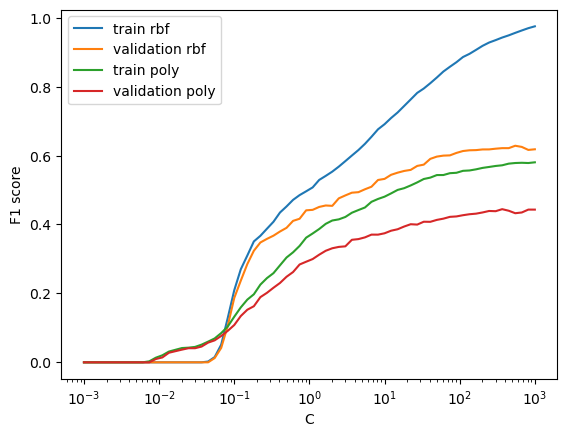

In [6]:
fig,ax = plt.subplots()

#plot train and validation accuracy
ax.plot(C,train_acc_rbf,label='train rbf')
ax.plot(C,val_acc_rbf,label='validation rbf')
ax.plot(C,train_acc_poly,label='train poly')
ax.plot(C,val_acc_poly,label='validation poly')
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('F1 score')
ax.legend()
plt.show()

In [13]:
P = [i for i in range(1,11)]

train_acc = []
val_acc = []

for p in P:
    
    model = SVC(kernel='poly',gamma='auto',random_state=random_state,degree=p)
    scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)
    train_acc.append(scores['train_score'].mean())
    val_acc.append(scores['test_score'].mean())

1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0


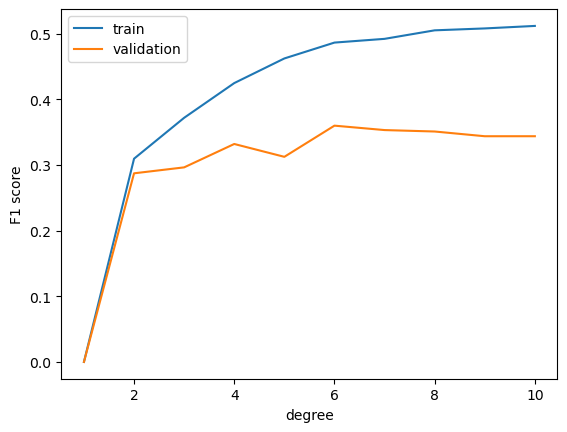

In [14]:
fig,ax = plt.subplots()

#plot train and validation accuracy
ax.plot(P,train_acc,label='train')
ax.plot(P,val_acc,label='validation')
ax.set_xlabel('degree')
ax.set_ylabel('F1 score')
ax.legend()
plt.show()

## grid search

In [8]:
from sklearn.svm import SVC

rbf_clf = SVC(kernel='rbf', random_state=75)

rbf_param_grid = {
    'C': np.logspace(-3, 2, 6),
    
    'gamma': np.logspace(-4, 1, 6),
}
rbf_param_grid

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
rbf_grid_search = GridSearchCV(
    estimator=rbf_clf,
    param_grid=rbf_param_grid,
    scoring='f1',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1)

rbf_grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV 1/4; 1/36] START C=0.001, gamma=0.0001......................................
[CV 2/4; 1/36] START C=0.001, gamma=0.0001......................................
[CV 3/4; 1/36] START C=0.001, gamma=0.0001......................................
[CV 4/4; 1/36] START C=0.001, gamma=0.0001......................................
[CV 1/4; 2/36] START C=0.001, gamma=0.001.......................................
[CV 2/4; 2/36] START C=0.001, gamma=0.001.......................................
[CV 3/4; 2/36] START C=0.001, gamma=0.001.......................................
[CV 4/4; 2/36] START C=0.001, gamma=0.001.......................................
[CV 1/4; 3/36] START C=0.001, gamma=0.01........................................
[CV 2/4; 3/36] START C=0.001, gamma=0.01........................................
[CV 1/4; 1/36] END C=0.001, gamma=0.0001;, score=(train=0.000, test=0.000) total time=   0.2s
[CV 3/4; 3/36] START C=0.001, gamm

GridSearchCV(cv=4, estimator=SVC(random_state=75), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             return_train_score=True, scoring='f1', verbose=10)

In [14]:
rbf_grid_search.best_params_, rbf_grid_search.best_score_

({'C': 100.0, 'gamma': 0.1}, 0.618651830160868)

Learning curve

In [18]:
X_train_lc,X_val_lc,y_train_lc,y_val_lc = train_test_split(X_train,y_train,test_size=0.2,random_state=random_state)

model = SVC(kernel='rbf',gamma=0.1,random_state=random_state,C= 100)
#Select a sample of X_train, with the corresponding y_train
train_acc_lc = []
val_acc_lc = []

from sklearn.metrics import f1_score
for sample in np.linspace(0.01,0.99,98):
    X_train_sample,X_out_sample,y_train_sample,y_out_sample = train_test_split(X_train_lc,y_train_lc,test_size=float(1 - sample),random_state=random_state)
    
    
    model.fit(X_train_sample,y_train_sample)
    
    y_pred = model.predict(X_val_lc)
    #Train accuracy
    y_pred_train = model.predict(X_train_sample)
    train_acc_lc.append(f1_score(y_train_sample,y_pred_train))
    
    #Validation accuracy
    val_acc_lc.append(f1_score(y_val_lc,y_pred))

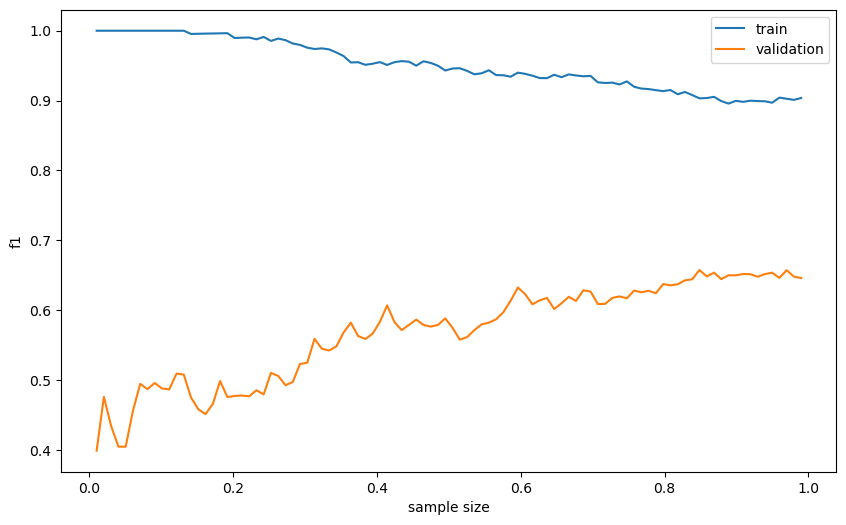

In [19]:
#Plot
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0.01,0.99,98),train_acc_lc,label='train')
plt.plot(np.linspace(0.01,0.99,98),val_acc_lc,label='validation')
plt.xlabel('sample size')
plt.ylabel('f1')
plt.legend()

## Score on test

In [20]:
model = SVC(kernel='rbf',gamma=0.1,random_state=random_state,C= 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test,y_pred))

0.5835411471321696
